<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center> <font color= #004A94> <font size = 6> Lic. Ingeniería Financiera </font> <br> <br> <font color= #047CFB> <font size = 4>I.F. María Fernanda Pinedo Talango - if705971@iteso.mx </font>

<center><font color= #004A94> <font size = 6> Microestructura y Sistemas de Trading </font> <br> <br>

<center><font color=#42c29b><font size=5> Laboratorio 2: Behavioral Finance </font> <br> <br>

<center> <font color= #047CFB> <font size = 4> Primavera 2020 </font>  |  <font color= #047CFB> <font size = 4> Repositorio: <a href='https://github.com/ferpinedot/LAB_2_MFPT'>https://github.com/ferpinedot/LAB_2_MFPT</a></font>

# Abstract

<font size = 3> Behavioral Finance es una rama de Behavioral Economics, que propone que las influencias psicológicas al igual que los sesgos cognitivos afectan el comportamiento financiero de los inversores.
Las influencias y los sesgos pueden ser la fuente de explicación de varios tipos de anomalías en el mercado y principalmente en el mercado bursátil. </font>

<font size = 3> En este proyecto, se busca por medio de Behavioral Finance, primeramente realizar un análisis de los movimientos del trader para que a través de estos, se encuentre qué tipo de trader es el usuario que realiza los movimientos, con cuales pares se siente más cómodo y ha tenido mayor nivel de asertividad y por lo tanto, si la estrategia que sigue ha sido lo suficientemente buena. </font>

# Módulos y dependencias e información inicial

In [1]:
# Descarga de librerías con sus respectivas abreviaciones 

import funciones as fn
import visualizaciones as vn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Descarga de librerías para gráficas
from plotly.offline import plot
import plotly.graph_objects as go

#import plotly.graph_objects as go
#import dash
#import dash_core_components as dcc
#import dash_html_components as html
#import chart_studio.plotly as py
#import plotly
#from plotly import version
#print (version)
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


C:\Users\User\Documents\fernanda pinedo\Documentos\ITESO\9th Semester\Microestructuras y Sistemas de Trading\LAB_2_MFPT\funciones.py:138: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2]:
# Lectura del archivo original

# Datos de ejemplo del prof
# datos = fn.f_leer_archivo(param_archivo = 'archivo_tradeview_1.xlsx', sheet_name = 0)

# Datos trading PAP
datos = fn.f_leer_archivo(param_archivo='archivos/archivo_pap_.xlsx', sheet_name= 0)

# Datos clase OANDA
# datos = fn.f_leer_archivo(param_archivo='archivos/archivo_oanda.xlsx', sheet_name= 0)

<font size = 3> A continuación se muestra el dataframe del archivo de excel dados, de donde se toman los datos de algunas columnas, para realizar cálculos futuros, agregados posteriormente a este mismo dataframe en nuevas columnas como se verá a continuación.
</font>

In [3]:
datos

,order,opentime,type,size,symbol,openprice,s/l,t/p,closetime,closeprice,commission,taxes,swap,profit
0,44785961,2020.02.28 20:22:37,sell,0.20,xauusd,1574.26000,1610.00000,1566.00000,2020.03.02 11:35:48,1610.00000,0,0,0,-714.80
1,44786021,2020.02.28 20:24:28,sell,0.20,gbpchf,1.23555,1.24589,1.22000,2020.03.02 17:06:39,1.22000,0,0,0,325.61
2,44786130,2020.02.28 20:27:33,sell,0.10,audcad,0.87069,0.87100,0.86400,2020.02.28 20:31:22,0.87100,0,0,0,-2.31
3,44786297,2020.02.28 20:29:38,buy,0.10,euraud,1.69633,1.69079,1.71000,2020.02.28 21:38:18,1.69079,0,0,0,-36.13
4,44786418,2020.02.28 20:31:20,sell,0.20,gbpjpy,137.90800,139.00000,137.47000,2020.03.02 00:59:53,137.47000,0,0,0,81.54
5,44786702,2020.02.28 20:37:44,sell,0.20,nzdjpy,67.31400,67.60000,66.75500,2020.03.02 07:39:32,67.31500,0,0,0,-0.19
6,44810504,2020.03.02 07:37:29,buy,0.20,xauusd,1604.22000,1598.00000,1618.00000,2020.03.02 09:07:24,1598.00000,0,0,0,-124.40
7,44923065,2020.03.04 02:40:45,sell,0.20,audchf,0.63175,0.63436,0.62304,2020.03.04 07:37:16,0.63155,0,0,0,4.18
8,44923094,2020.03.04 02:41:52,buy,0.20,audnzd,1.05144,1.04595,1.05261,2020.03.04 16:06:13,1.05261,0,0,0,14.70
9,44927912,2020.03.04 07:39:28,buy,0.20,audnzd,1.05103,1.04900,1.05100,2020.03.04 07:39:30,1.05100,0,0,0,-0.38


# Mediciones de estadísticas básicas

In [4]:
# Importar las funciones para el análisis de estadísticas básicas de los movimientos del trader

datos = fn.f_columnas_tiempos(datos)
datos = fn.f_columnas_pips(datos)
estadisticas = fn.f_basic_stats(datos)

<font size = 3> Como se observará a continuación en la tabla, después de la columan 'profit', se agregaron 4 columnas más, en donde la primera llamada 'tiempo' se logra con una función en donde se convierten el opentime y closetime en tipo datetime en la cual se puede calcular el tiempo en segundos desde el momento en el que la operación fue abierta, hasta el momento en el que fue cerrada.
<br>
    La forma en la que fue creada esta nueva columna, es por medio de la función mostrada a continuación:
</font>

In [5]:
def f_columnas_tiempos(param_data):
    """
    Parameters
    ----------
    param_data : pd.DataFrame : df con información de transacciones ejecutadas
    
    Returns
    -------
    param_data : pd.DataFrame : df con columna agregada 'tiempo'
    
    Debugging
    ---------
    param_data = f_leer_archivo("archivo_tradeview_1.xlsx")
    """
    
    # convertir columnas de 'closetime' y 'opentime' utilizando pd.to_datatime
    param_data['closetime'] = pd.to_datetime(param_data['closetime'])
    param_data['opentime'] = pd.to_datetime(param_data['opentime'])

    # tiempo transcurrido de una operación
    # momento de cierre - momento de apertura / notación científica para todas las filas 
    param_data['tiempo'] = [(param_data.loc[i, 'closetime'] -
                             param_data.loc[i, 'opentime']).delta / 1e9
                            for i in range(0, len(param_data['closetime']))]
    
    return param_data

<font size = 3> Para las siguientes columnas de pips, pips acumulados y el profit acumulado, se esperan calcular gracias a la función que se muestra a continuación, en la que, dados ya los tamaños de pips de divisas previamente de acuerdo a cada una, se calcula el tamaño de los pips ganados (positivos) o perdidos (negativos). 
<br>
En la columna siguiente, los pips acumulados, como su nombre lo dice, es el total de los pips que se han obtenido como ganancia o périda, de los movimientos a lo largo del historial del trader.
<br>
La última columna, la acumulación de profit, es la suma total de las ganancias, menos las pérdidas, en unidades monetarias.
</font>

In [6]:
def f_columnas_pips(datos):
    """
    Parameters
    ----------
    datos : pd.DataFrame : dataframe con las transacciones ejecutadas ya con la columna 'tiempos'

    Returns
    -------
    param_data : pd.DataFrame : dataframe anterior pero con columnas 'pips' y 'pips acumulados'
    
    Debugging
    ---------
    datos =  f_leer_archivo("archivo_tradeview_1.xlsx")
    
    """
    # Calcular los pips haciendo la resta de los precios de cierre, menos los de apertura y multiplicado por el número de pips
    datos['pips'] = [(datos.closeprice[i] - datos.openprice[i])*f_pip_size(datos.symbol[i]) for i in range(len(datos))]
    datos['pips'][datos.type == 'sell'] *= -1
    # Suma acumulativa de los pips obtenidos en la columna anterior
    datos['pips_acm'] = datos.pips.cumsum()
    # Suma acumulativa de los profits obtenidos a través de los días
    datos['profit_acm'] = datos['profit'].cumsum()
    
    return datos.copy()

In [7]:
# Nuevo dataframe con las cuatro columnas agregadas al dataframe original

datos.head(20)

,order,opentime,type,size,symbol,openprice,s/l,t/p,closetime,closeprice,commission,taxes,swap,profit,tiempo,pips,pips_acm,profit_acm
0,44785961,2020-02-28 20:22:37,sell,0.2,xauusd,1574.26000,1610.00000,1566.00000,2020-03-02 11:35:48,1610.00000,0,0,0,-714.80,227591.0,-357.4,-357.4,-714.80
1,44786021,2020-02-28 20:24:28,sell,0.2,gbpchf,1.23555,1.24589,1.22000,2020-03-02 17:06:39,1.22000,0,0,0,325.61,247331.0,155.5,-201.9,-389.19
2,44786130,2020-02-28 20:27:33,sell,0.1,audcad,0.87069,0.87100,0.86400,2020-02-28 20:31:22,0.87100,0,0,0,-2.31,229.0,-3.1,-205.0,-391.50
3,44786297,2020-02-28 20:29:38,buy,0.1,euraud,1.69633,1.69079,1.71000,2020-02-28 21:38:18,1.69079,0,0,0,-36.13,4120.0,-55.4,-260.4,-427.63
4,44786418,2020-02-28 20:31:20,sell,0.2,gbpjpy,137.90800,139.00000,137.47000,2020-03-02 00:59:53,137.47000,0,0,0,81.54,188913.0,43.8,-216.6,-346.09
5,44786702,2020-02-28 20:37:44,sell,0.2,nzdjpy,67.31400,67.60000,66.75500,2020-03-02 07:39:32,67.31500,0,0,0,-0.19,212508.0,-10.0,-226.6,-346.28
6,44810504,2020-03-02 07:37:29,buy,0.2,xauusd,1604.22000,1598.00000,1618.00000,2020-03-02 09:07:24,1598.00000,0,0,0,-124.40,5395.0,-62.2,-288.8,-470.68
7,44923065,2020-03-04 02:40:45,sell,0.2,audchf,0.63175,0.63436,0.62304,2020-03-04 07:37:16,0.63155,0,0,0,4.18,17791.0,2.0,-286.8,-466.50
8,44923094,2020-03-04 02:41:52,buy,0.2,audnzd,1.05144,1.04595,1.05261,2020-03-04 16:06:13,1.05261,0,0,0,14.70,48261.0,11.7,-275.1,-451.80
9,44927912,2020-03-04 07:39:28,buy,0.2,audnzd,1.05103,1.04900,1.05100,2020-03-04 07:39:30,1.05100,0,0,0,-0.38,2.0,-0.3,-275.4,-452.18


<font size = 3> Con todo lo anterior, ya se pueden realizar y analizar estadísticas básicas para obtener una idea del número de operaciones ganadoras, perdedoras, si se han realizado más compras que ventas o viceversa, la efectividad de las operaciones, entre otras como se mostrará en la función a continuación:
</font>

In [8]:
def f_basic_stats(datos):
    """
    Parameters
    ----------
      datos : pd.DataFrame : dataframe con las transacciones ejecutadas, después de 'tiempos'
    
    Returns
    -------
    Dos dataframes:
    df_1_tabla : pd.DataFrame : dataframe con estadísticas básicas del comportamiento del trader
    df_1_ranking : pd.DataFrame : dataframe con un ranking entre el 0 y el 100 expresada en porcentaje, en donde se califica con cuales divisas se obtuvieron operaciones precisas realizadas
        
    Debugging
    ---------
    datos = f_leer_archivo("archivo_tradeview_1.xlsx")
    """
    # DataFrame con sus medidas, valores y descripciones 
    df_1_tabla = pd.DataFrame({'Ops totales': [len(datos['order']), 'Operaciones totales'],
                                'Ops ganadoras': [len(datos[datos['profit'] >= 0]), 'Operaciones ganadoras'],
                                'Ops ganadoras_b': [len(datos[(datos['type'] == 'buy') & (datos['profit'] >= 0)]), 'Operaciones ganadoras en compra'],
                                'Ops ganadoras_s': [len(datos[(datos['type'] == 'sell') & (datos['profit'] >= 0)]), 'Operaciones ganadoras en venta'],
                                'Ops perdedoras': [len(datos[datos['profit'] < 0]), 'Operaciones perdedoras'],
                                'Ops perdedoras_b': [len(datos[(datos['type'] == 'buy') & (datos['profit'] < 0)]), 'Operaciones perdedoras en compra'],
                                'Ops perdedoras_s' : [len(datos[(datos['type'] == 'sell') & (datos['profit'] < 0)]), 'Operaciones perdedoras en venta'],
                                'Profit media': [datos['profit'].median(), 'Mediana de profit de operaciones'],
                                'Pips media': [datos['pips'].median(), 'Mediana de pips de operaciones'],
                                'r_efectividad': [len(datos[datos['profit'] >= 0])/len(datos['order']), 'Ganadoras Totales/Operaciones Totales'],
                                'r_proporcion': [len(datos[datos['profit'] >= 0]) / len(datos[datos['profit'] < 0]), 'Ganadoras Totales/Perdedoras Totales'],
                                'r_efectividad_b': [len(datos[(datos['type'] == 'buy') & (datos['profit'] >= 0)]) / len(datos['order']), 'Operaciones ganadoras de compra/Operaciones Totales'],
                                'r_efectividad_s': [len(datos[(datos['type'] == 'sell') & (datos['profit'] >= 0)]) / len(datos['order']), 'Operaciones ganadoras de venta/Operaciones Totales'],
                                }, index = ['Valor', 'Descripción']).transpose()
    
    tb1 = pd.DataFrame({i: len(datos[datos.profit >0][datos.symbol == i])/len(datos[datos.symbol == i])
                        for i in datos.symbol.unique()}, index = ['rank']).transpose()
    # Convertir los 'valores' en flotantes
    convert_dict = {'Valor': float} 
    df_1_tabla = df_1_tabla.astype(convert_dict) 
    
    # Segundo dataframe con los datos del dataframe tb1 ordenados de manera descendente, multiplicados por 100 para ser mostrados en porcentaje como el 'ranking'
    df_1_ranking = (tb1*100).sort_values(by = 'rank', ascending = False).T.transpose()
    
    return {'df_1_tabla' : df_1_tabla.copy(), 'df_1_ranking' : df_1_ranking.copy()}

<font size =3> Con la función mostrada anteriormente, se forman dos dataframes, donde el primero indica las medidas mostradas a continuación como las operaciones totales, ganadoras, perdedoras, en compra, venta, como la media del profit y de pips, así como:
<br>
- El **ratio de efectividad**: Calculando las operaciones ganadoras totales entre las operaciones totales, donde el resultado muestra el porcentaje de operaciones ganadoras con respecto al total del número de operaciones.
<br>
- El **ratio de proporción**: El cual se calcula dividiendo el total de operaciones ganadoras entre las perdedoras totales, donde si el resultado es mayor a 1, quiere decir que existen más operaciones ganadoras que perdedoras.
<br>
- El **ratio de efectividad de compra**: El cual muestra el porcentaje las operaciones que fueron ganandoras en posición de compra con respecto al total de las operaciones.
<br>
- El **ratio de efectividad de venta**: Calcula el porcentaje de las operaciones que fueron ganadoras en posición de venta del total de las operaciones.
</font>

In [9]:
estadisticas['df_1_tabla']

,Valor,Descripción
Ops totales,36.000000,Operaciones totales
Ops ganadoras,19.000000,Operaciones ganadoras
Ops ganadoras_b,9.000000,Operaciones ganadoras en compra
Ops ganadoras_s,10.000000,Operaciones ganadoras en venta
Ops perdedoras,17.000000,Operaciones perdedoras
Ops perdedoras_b,8.000000,Operaciones perdedoras en compra
Ops perdedoras_s,9.000000,Operaciones perdedoras en venta
Profit media,9.440000,Mediana de profit de operaciones
Pips media,6.450000,Mediana de pips de operaciones
r_efectividad,0.527778,Ganadoras Totales/Operaciones Totales


<font size = 3> Como se observa en los resultados de la tabla anterior, el *ratio de fectividad* es mayor al 50%, indicando que más de la mitad de las operaciones ejecutadas han sido ganadoras, el *ratio de proporción* indica que, como ya sabíamos, hay más operaciones ganadoras que perdedoras, lo que también indica que por cada operación perdedora, existen 1.11 operaciones ganadoras. El *ratio de efectividad de compra* indica que por cada operación 0.25 fueron de compra ganadoras, y en el caso del *ratio de efectividad de venta*, indica que por cada operación, 0.27 fueron operaciones de venta ganadoras.
 </font>

<font size = 3> 
    El segundo dataframe que arroja, es una tabla con las divisas únicas con las cuales se hicieron movimientos en las cuentas y muestra el **ratio de efectividad** de las operaciones, tomando en cuenta esto, quiere decir que el porcentaje que se muestra, es el porcentaje de veces que se hizo algún movimiento con dicha divisa, y esta cerró con ganancias.
</font>

In [10]:
estadisticas['df_1_ranking']

,rank
usdjpy,100.0
usdchf,100.0
usdcad,100.0
nzdcad,100.0
audusd,100.0
gbpchf,100.0
audchf,100.0
xauusd,60.0
audnzd,50.0
cadchf,50.0


<font size = 3> En el caso del dataframe anterior, se muestra que cada vez que se han realizado operaciones con las divisas: usd/jpy, usd/chf, usd/cad, nzd/cad, entre otras, se han obtenido un 100% de acertividad, siendo esto, que todas las operaciones ejecutadas con ellas han sido ganadoras. A diferencia de divisas como aud/cad, nzd/usd, entre otras, las cuales en ninguna operación ejecutada con ellas, ha sido ganadora.
</font>

In [11]:
df_ranking = pd.DataFrame(estadisticas['df_1_ranking'])
df_1_ranking = df_ranking.reset_index()
df_ranking = df_1_ranking.rename(columns = {"index": "pares", "rank": "rank"})

labels = df_ranking['pares']
values = df_ranking['rank']
pie_rank = go.Figure(data = [go.Pie(labels=labels, values=values, pull=[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], title = 'Asertividad de pares')])
pie_rank.update_layout(title = "Ranking de asertividad de pares", font = dict(size = 16))
pie_rank.show()

# Medidas de atribución al desempeño

<font size = 3> Para calcular las medidas de atribución al desempeño, se necesita calcular una nueva columna al dataframe del principio, iniciando la cuenta con $5,000 USD y sumando ganancias y restando las pérdidas, como se observa en la función a continuación:
</font>

In [12]:
def f_capital_acm(datos):
    """
    Parameters
    ----------
    datos : pandas.DataFrame : dataframe con transacciones ejecutadas después de haber corrido 'tiempos' y 'pips'

    Returns
    -------
    datos : pandas.DataFrame : se le agrega una columna al dataframe
    
    Debugging
    ---------
    datos = f_leer_archivo("archivo_tradeview_1.csv")
    """
    
    # Se forma una nueva columna inicializada en $5,000 donde se le suma/resta el profit acumulado en cada renglón
    datos['capital_acm'] = 5000 + datos.profit_acm 
    return datos.copy()


<font size=3> En la siguiente función, se obtienen los datos del dataframe inicial con las columnas agregadas y de regreso se obtiene un nuevo dataframe con tres columnas, *timestamp* que tienen las fechas por cada día desde el primer día que se hicieron movimientos de la cuenta, hasta el último día, donde la segunda columna del *profit diario* donde por cada día del timestamp se proyecta el profit de cada día recorrido, y en el *profit acumulado*, iniciando con una cuenta de $5,000 USD, agregando el profit obtenido al día 
</font>

In [13]:
def f_profit_diario(datos):
     """
     Parameters
     ----------
     datos : pandas.DataFrame : dataframe de fechas históricas solo usando columnas timestamp y profit
  
     Returns
     -------
     datos : pandas.DataFrame : dataframe con las columnas timestamp, profit diario y el acumulado
  
     Debugging
     ---------
     datos = f_leer_archivo("archivo_tradeview_1.xlsx")
     """

     
     # Agregar normalize a closetime
     diario = pd.date_range(datos.closetime.min(), datos.closetime.max()).normalize()
     
     # convertir a dataframe las fechas diarias
     fechas = pd.DataFrame({'timestamp' : diario})
     
     # Agregar normalize a groupby
     groups = datos.groupby(pd.DatetimeIndex(datos['closetime']).normalize())
     
     profit = groups['profit'].sum()
     # convertir los profits diarios a dataframe
     profit_diario = pd.DataFrame({'profit_d' : [profit[i] if i in profit.index else 0 for i in diario]})
     profit_acm = np.cumsum(profit_diario) + 5000
     # juntar en un solo dataframe los dos dataframes anteriores fechas y profits diarios
     f_p1 =pd.merge(fechas, profit_diario, left_index = True, right_index = True)
     # juntar el dataframe anterior de los dos df con los profits acumulados
     df_profit_diario1 = pd.merge(f_p1, profit_acm, left_index = True, right_index = True)
     # renombrar las columnas del nuevo dataframe
     df_profit_diario = df_profit_diario1.rename(columns = {"profit_d_x" : "profit_d", "profit_d_y" : "profit_acm_d"})
     
     return df_profit_diario

In [14]:
fn.f_profit_diario(datos)

,timestamp,profit_d,profit_acm_d
0,2020-02-28,-38.44,4961.56
1,2020-02-29,0.00,4961.56
2,2020-03-01,0.00,4961.56
3,2020-03-02,-432.24,4529.32
4,2020-03-03,0.00,4529.32
5,2020-03-04,18.50,4547.82
6,2020-03-05,177.16,4724.98
7,2020-03-06,194.20,4919.18
8,2020-03-07,0.00,4919.18
9,2020-03-08,0.00,4919.18


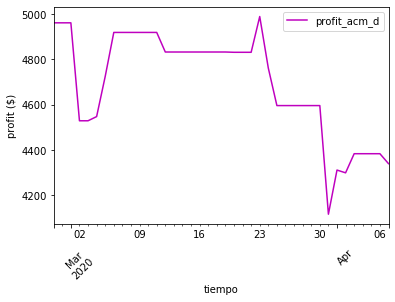

In [15]:
vn.profitd(datos)

In [67]:
profit_d = fn.f_profit_diario(datos)
profs = go.Figure(data = [go.Scatter(x= profit_d['timestamp'], y = profit_d['profit_acm_d'])])
profs.update_layout(title = "Profit acumulado al día", xaxis_title = "Tiempo (fechas)", yaxis_title = "Profit ($)")

profs.show()

<font size = 3> Con el dataframe anterior, se puede obtener un dataframe con las medidas de atribución al desempeño que por medio de la función que se muestra a continuación siendo estas el sharpe ratio, el sortino ratio en posición de compra, el sortino ratio en posición de venta, drawdown del capital y drawup del capital, así como el information ratio que posteriormente se explican:
</font>

In [16]:
def f_stats_mad(datos):
    """
    Parameters
    ----------
    datos : pandas.DataFrame : dataframe con transacciones ejecutadas después de tiempos y pips
    
    Returns
    -------
    datos : pandas.DataFrame : dataframe con rendimientos logarítmicos. Tomando en cuenta que se inicializa con una cuenta de $5,000

    Debugging
    ---------
    datos = 'f_leer_archivo("archivo_tradeview_1.csv")
    
    """
    profit_d = f_profit_diario(datos)
    
    # Sharpe ratio
    rend_log = np.log(profit_d.profit_acm_d[1:].values/profit_d.profit_acm_d[:-1].values)
    rf = 0.08/300
    mar = 0.3/300
    
        
    # Sortino compra
    # Numerador
    s_buy = (f_profit_diario(datos[datos['type'] == 'buy']))
    rend_log_b = np.log(s_buy.profit_acm_d[1:].values / s_buy.profit_acm_d[:-1].values)
    # Denominador
    tdd_sb = rend_log_b - mar
    tdd_sb[tdd_sb > 0] = 0
    # Final
    sortino_b = (rend_log_b.mean() - mar) / (((tdd_sb*2).mean())*0.5)
    
    # Sortino venta
    # Numerador
    s_sell = (f_profit_diario(datos[datos['type'] == 'sell']))
    rend_log_s = np.log(s_sell.profit_acm_d[1:].values / s_sell.profit_acm_d[:-1].values)
    # Denominador
    tdd_ss = rend_log_s - mar
    tdd_ss[tdd_ss > 0] = 0
    # Final
    sortino_s = (rend_log_s.mean() - mar) / ((tdd_ss*2).mean())*0.5
    
    
    # DD y DU
    where_row = profit_d.loc[profit_d['profit_acm_d'] == profit_d.profit_acm_d.min()]
    where_position = where_row.index.tolist()
    
    # Drawdown
    prev_where = profit_d.loc[0:where_position[0]]
    where_max_prev = profit_d.loc[profit_d['profit_acm_d'] == prev_where.profit_acm_d.max()]
    where_min_prev = profit_d.loc[profit_d['profit_acm_d'] == prev_where.profit_acm_d.min()]
    max_dd = where_max_prev.iloc[0]['profit_acm_d']
    min_dd = where_min_prev.iloc[0]['profit_acm_d']
    dd = max_dd - min_dd
    fecha_i_dd = where_max_prev.iloc[0]['timestamp']
    fecha_f_dd = where_min_prev.iloc[0]['timestamp']
    drawdown =  "{}, {}, ${:.2f}" .format(fecha_i_dd, fecha_f_dd, dd)
     
    # Drawup
    foll_where = profit_d.loc[where_position[0]:]
    where_max_foll = profit_d.loc[profit_d['profit_acm_d'] == foll_where.profit_acm_d.max()]
    where_min_foll = profit_d.loc[profit_d['profit_acm_d'] == foll_where.profit_acm_d.min()]
    max_du = where_max_foll.iloc[0]['profit_acm_d']
    min_du = where_min_foll.iloc[0]['profit_acm_d']
    du = max_du - min_du
    fecha_f_du = where_max_foll.iloc[0]['timestamp']
    fecha_i_du = where_min_foll.iloc[0]['timestamp']
    drawup =  "{}, {}, ${:.2f}" .format(fecha_i_du, fecha_f_du, du)        

    
    # Information Ratio
    benchmark_original = pd.DataFrame(web.YahooDailyReader('^GSPC', profit_d['timestamp'].min(), profit_d['timestamp'].max(), interval='d').read()['Adj Close'])
    # Ajustar fechas como columna en el dataframe
    benchmark = benchmark_original.reset_index()
    # Agregar columna de los rendimientos logarítmicos de los precios de Cierre Ajustado del SP500
    benchmark['rend_log'] = pd.DataFrame(np.log(benchmark['Adj Close'][1:].values / benchmark['Adj Close'][:-1].values))
    # Juntar el dataframe de profits con el benchmark en uno solo
    bench_merge = profit_d.merge(benchmark,  left_on = 'timestamp', right_on = 'Date')
    # Recorrer los valores de los rendimientos logarítmicos una posición abajo y llenar con 0
    bench_merge['rend_log'] = bench_merge['rend_log'].shift(1, fill_value = 0)
    
    # Cálculo de rendimientos logarítmicos de los profit_acm_d
    rend_log_profit = pd.DataFrame(np.log(bench_merge.profit_acm_d[1:].values/bench_merge.profit_acm_d[:-1].values))
    # rend_log_profit = rend_log_profit.shift(1, fill_value = 0)
    
    # Agregar la columna de rendimientos de profit_acm_d 
    bench_merge.insert(3, column = 'rend_log_profit', value = rend_log_profit)
    # Recorrer una fila hacia abajo los rendimientos en el dataframe
    bench_merge['rend_log_profit'] = bench_merge['rend_log_profit'].shift(1, fill_value = 0)
    
    # Numerador Information Ratio
    # Promedio de rendimientos del profit_acm_d
    profit_prom = bench_merge['rend_log_profit'].mean()
    # Promedio de rendimientos del SP500
    bench_prom = bench_merge['rend_log'].mean()
    # Numerador del information ratio = diferencia de los dos anteriores
    num_ir = profit_prom - bench_prom
    
    # Denominador Information Ratio
    # Diferencia por rows de los rendimientos del profit_acm_d y del SP500
    dif_denom = bench_merge['rend_log_profit'] - bench_merge['rend_log']
    # Desviación estándar de la diferencia
    denom_ir = dif_denom.std()
    
    # Cálculo del ratio
    info_ratio = num_ir/denom_ir
    
    
    # Métricas
    metrica = pd.DataFrame({'métricas': ['sharpe', 'sortino_b', 'sortino_s', 'drawdown_cap_b', 'drawdown_cap_s', 'information_r']})
    valor = pd.DataFrame({'valor' : [((rend_log.mean() - rf)/ rend_log.std()), 
                                     (sortino_b),
                                     (sortino_s),
                                     (drawdown),
                                     (drawup),
                                     (info_ratio)
                                     ]})
    
    df_mad1 = pd.merge(metrica, valor, left_index = True, right_index = True)
    descripcion = pd.DataFrame({'descripción': ['Sharpe Ratio', 'Sortino Ratio para Posiciones de Compra', 'Sortino Ratio para Posiciones de Venta', 'DrawDown de Capital', 'DrawUp de Capital', 'Information Ratio']})
    df_MAD = pd.merge(df_mad1, descripcion, left_index = True, right_index= True)
    # convert_dict = {'valor': float} 
    # df_MAD = df_MAD.astype(convert_dict) 
    
    return df_MAD
    

In [17]:
desempeno = fn.f_capital_acm(datos)
desempeno = fn.f_profit_diario(datos)
desempeno = fn.f_stats_mad(datos)

<font size =3> A continuación las Medidas de Atribución al Desempeño, su significado e interpretación, posteriormente el dataframe con los resultados de estos movimientos:
<br>
- **Sharpe Ratio**: Se calcula substrayendo la tasa libre de riesgo del promedio de los rendimientos logarítmicos de los movimientos, y dividiendo este resultado entre la desviación estándar de los mismos (rendimientos logarítmicos).
    En general, cuanto mayor es el valor de la relación de Sharpe, más atractivo es el rendimiento ajustado al riesgo.
    \begin{equation*} 
    Sharpe Ratio = \frac{R_p-rf}{\sigma_p}
    \end{equation*}
<br>
- **Sortino Ratio (Posiciones Compra)**: Se calcula usualmente como el Sharpe, con excepción del denominador que es la desviación estándar de la desventaja, traducido del inglés. Pero en el caso de este laboratorio, en vez de tomar la tasa libre de riesgo, a los rendimientos de las posiciones de compra se les restará el *MAR* conocido por sus siglas en inglés (Minimum Acceptable Return) siendo este el rendimiento promedio objetivo que se desea obtener por parte del trader.
    Con respecto al denominador, se calcula con los rendimientos del período que estén por debajo del MAR, por lo que sería únicamente la desviación estándar de los rendimientos por debajo del rendimiento objetivo.
    \begin{equation*}
    Sortino Ratio_b = \frac{R_b-mar}{\sigma_d}
    \end{equation*}
<br>
- **Sortino Ratio (Posiciones Venta)**: Se calcula usualmente como el Sharpe, con excepción del denominador que es la desviación estándar de la desventaja, traducido del inglés. Pero en el caso de este laboratorio, en vez de tomar la tasa libre de riesgo, a los rendimientos de las posiciones de venta se les restará el *MAR* conocido por sus siglas en inglés (Minimum Acceptable Return) siendo este el rendimiento promedio objetivo que se desea obtener por parte del trader.
    Con respecto al denominador, se calcula con los rendimientos del período que estén por debajo del MAR, por lo que sería únicamente la desviación estándar de los rendimientos por debajo del rendimiento objetivo.
    \begin{equation*}
    Sortino Ratio_s = \frac{R_s-mar}{\sigma_d}
    \end{equation*}
<br>
- **DrawDown (Capital)**: En el caso del drawdown, se calcula identificando el pico (el precio más alto y su ubicación en fecha) y si en alguna fecha posterior a eso, hubo una tendencia bajista (que los precios hayan disminuido en fechas posteriores al precio más alto) encontrando el precio más bajo posterior al pico. Dando como resultado, la diferencia del capital entre el pico y el final de la tendencia bajista.
<br>
- **DrawUp (Capital)**: En el caso del drawup, se calcula identificando el suelo (el precio más bajo y su ubicación en fecha) y si en alguna fecha posterior a eso, hubo una tendencia alcista (que los precios hayan aumentado en fechas posteriores al precio más bajo) encontrando el precio más alto posterior al punto más bajo encontrado. Dando como resultado, la diferencia del capital entre el punto más bajo y el final de la tendencia alcista.
<br>
- **Information Ratio**: Igualmente un ratio parecido al Sharpe, pero en vez de utilizar la tasa libre de riesgo, a los rendimientos logarítmicos de los movimientos se les restan los rendimientos logarítmicos del índice o benchmark, que en este caso se utilizó el de SP500 y en el denominador se utiliza la información de todos los rendimientos de la estrategia de trading una vez que se descuentan los rendimientos del benchmark. De tal manera que, al descontar la información del mercado para el rendimiento (numerador) como para la medida de riesgo (numerador) se está buscando tener una medida de la "información" extra que el trader tiene/genera o que logra capturar de comportamiento de los activos y que podría hacer que sus cifras sean mejores que las de un benchmark.    
    \begin{equation*}
    Information Ratio = \frac{R_p - R_i}{Tracking Error}
    \end{equation*}
    
</font>

In [18]:
desempeno

,métricas,valor,descripción
0,sharpe,-0.132266,Sharpe Ratio
1,sortino_b,0.280573,Sortino Ratio para Posiciones de Compra
2,sortino_s,0.170999,Sortino Ratio para Posiciones de Venta
3,drawdown_cap_b,"2020-03-23 00:00:00, 2020-03-31 00:00:00, $872.29",DrawDown de Capital
4,drawdown_cap_s,"2020-03-31 00:00:00, 2020-04-03 00:00:00, $266.96",DrawUp de Capital
5,information_r,-0.0145474,Information Ratio


## Interpretación de resultados

<font size =3> 
- **Sharpe Ratio**: Si el índice o ratio de Sharpe es negativo, indica que el rendimiento de los movimientos es inferior a la rentabilidad sin riesgo. Todo valor del Sharpe ratio inferior a uno, significa que el rendimiento de los activos es inferior al riesgo que estamos asumiendo al invertir en un activo determinado.
    Si el Sharpe ratio es mayor a 1.0 se considera aceptable o bueno para los inversores, mayor a 2.0 es clasificado como muy bueno y un ratio de 3.0 o más, se considera excelente.
    
- **Sortino Ratio**: Mientras más elevado sea el valor del Sortino ratio, mejor será la calificación de los movimientos, ya que quiere decir que estos son operados eficientemente y no se está tomando riesgos innecesarios los cuales no están siendo recompensados con rendimientos mayores. Un sortino ratio bajo o negativo indica que al inversor no se le está recompensando por los riesgos que se están tomando. En este caso, ambos sortinos, de compra y de venta, son positivos, aunque un poco bajos, lo que indica que, como se vio en el sharpe, no se están obteniendo los rendimientos esperados por el riesgo tomado.

- **Drawdown**: Los valores que se observan en la celda de valores del drawdown, son las fechas de inicio y fechas finales del drawdown junto con la cantidad que, en este caso disminuyó. 
    
- **Drawup**: Los valores observados son las fechas de inicio y fechas finales del drawup junto con la cantidad que aumentó de una fecha a otra.

- **Information Ratio**: En el caso de este ratio, mientras mayor sea el valor, mejor es calificada la actividad del trader, ya que este ratio mide los rendimientos de los movimientos del trader dividida entre la cantidad de riesgo relacionada al índice que el trader toma. 
    
</font>

# Behavioral Finance

### Disposition Effect

<font size = 3> 
    Este sesgo cognitivo fue propuesto por los autores Kahneman y Tversky; para el caso de trading, aplica como el efecto que se puede observar en el histórico de un trader sobre el hecho que tiende a cortar las ganancias rápido y mantener las pérdidas mucho tiempo, es decir, a materializar las ganancias mas frecuentemente que las pérdidas. 
<br>
    Se menciona que hay 2 aproximaciones para abordar la existencia de este sesgo:
<br>
1. Por error de percepción
2. Por error de valuación
<br>
    
En este laboratorio se utilizará la 2da opción para construir esta última parte. 
    
</font>

<font size = 3> Para esta parte del laboratorio, se crea la función *f_sesgos_cognitivos*, la cual busca los movimientos ganadores y por cada operación ganadora se buscan las operaciones que se encontraban abiertas en el momento de cierre de la operación ganadora, entonces se descarga el precio de la operación abierta al momento del cierre de la operación ganadora, utilizando las funciones de *f_prices* para la descarga de precios y *f_instrument* para convertir la simbología a la misma utilizada en OANDA al momento de descargar los datos necesarios.
    
</font>

In [19]:
def f_prices(param_ins, date):
    """
    Parameters
    ----------
    param_ins : str : instrumento del cual se requiere obtener el precio
    date : date : fecha en la que se requiere el precio del instrumento

    Returns
    -------
    float : precio del instrumento en la fecha que se pidió en opening
    
    Debuggin
    --------
    """
    # Descargar los precios de apertura:
    
    # Inicializar API de OANDA
    api_oa = API(environment = "practice", access_token = dt.OA_Ak)
    # Volver la fecha a str
    fecha = date.strftime('%Y-%m-%dT%H:%M:%S')
    # Definir los parámetros 
    parameters = {"count": 1, "dailyAlignment": 16, "from": fecha, "granularity": 'M1', "price": "M"}
    # Definir el instrumento y con los parámetros con los que se descargarán de OANDA
    instrumento = instruments.InstrumentsCandles(instrument = param_ins, params = parameters)
    # Descargarlo de OANDA
    response = api_oa.request(instrumento)
    # En fomato candles se encuentran los precios
    prices = response.get("candles")
    # Dentro de candles entrar al diccionario 0 y posteriormente al 'mid' donde están el precio cierre 'c', high 'h', low 'l', y open 'o'
    return float(prices[0]['mid']['o'])

In [20]:
def f_instrument(ins):
    """
    Parameters
    ----------
    ins : str : instrumento del precio que se necesite

    Returns
    -------
    str : instrumento con un formato en mayúsculas y con _ cada 3 letras
    
    Debuggin
    --------
    instrument = 'usdmxn'
    
    """
    # Cambiar automáticamente el nombre de los instrumentos en minúscula a mayúscula y
    # cambiando al formato para que OANDA pueda leer qué instrumentos
    return ins.upper()[:3] + '_' + ins.upper()[3:]

<font size = 3> De las operaciones abiertas encontradas, ya con el precio, se busca cuál de ellas tenía un pérdida flotante, lo cual sería que el precio al momento del cierre de la ganadora, la operación abierta tuviera un precio menor a su valor de apertura si se trata de un movimiento de *compra* o si se encontraba en un precio más elevado que la posición de inicio si se trata de *venta*. De todas las pérdidas flotantes al momento del cierre de la operación ganadora, se toma la de pérdida mayor y esa es la que se compara con la ganadora. 
<br>
    Esto se muestra de mejor manera en el diccionario mostrado a continuación, el cual nombra como *ocurrencia* cada vez que esto sucede, dando los datos principales tanto de la operación ganadora, como de la operación abierta perdedora, como el timestamp, qué instrumento era, si se trataba de compra o venta, el volumen de la operación en lotes, así como algunos ratios.
</font>

In [21]:
sesgos = fn.f_sesgos_cognitivos(datos)

In [22]:
# Diccionario de ocurrencias

sesgos['ocurrencias']

[{'ocurrencia 1': {'timestamp': Timestamp('2020-03-02 00:59:53'),
   'operaciones': {'ganadora': {'instrumento': 'gbpjpy',
     'sentido': 'sell',
     'volumen': 0.2,
     'capital_gand': 81.54,
     'capital_acm': 4653.91},
    'perdedora': {'instrumento': 'xauusd',
     'sentido': 'sell',
     'volumen': 0.2,
     'profit': -714.8,
     'capital_perd': -600.44}},
   'ratio_cp_capital_acm': 12.902,
   'ratio_cg_capital_acm': 1.752,
   'ratio_cp_cg': 7.364}},
 {'ocurrencia 2': {'timestamp': Timestamp('2020-04-02 01:30:14'),
   'operaciones': {'ganadora': {'instrumento': 'audusd',
     'sentido': 'buy',
     'volumen': 0.15,
     'capital_gand': 22.5,
     'capital_acm': 4334.35},
    'perdedora': {'instrumento': 'usdmxn',
     'sentido': 'buy',
     'volumen': 0.15,
     'profit': -59.03,
     'capital_perd': -51.414}},
   'ratio_cp_capital_acm': 1.186,
   'ratio_cg_capital_acm': 0.519,
   'ratio_cp_cg': 2.285}},
 {'ocurrencia 3': {'timestamp': Timestamp('2020-04-02 03:55:00'),
   'op

<font size = 3> Como resultado de la función *f_sesgos_cognitivos*, se obtienen el número de *ocurrencias*, el *status quo*, que en este caso es el porcentaje de ocurrencias donde el capital de la operación perdedora entre el capital acumulado es menor que el capital de la oepración ganadora entre el capital acumulado; la *averisón a la pérdida*, siendo este el porcentaje de ocurrencias en donde el capital de la operación perdedora entre la operación ganadora es mayor a 1.5; así como la *sensibilidad decreciente*, dando los valores si o no, siendo 'si' si el capital acumulado de la cuenta aumentó, si el capital ganador o el capital perdedor aumentó, si el ratio de capital perdedor entre capital ganador sigue siendo mayor a 1.5, y 'no' si alguna de las anteriores o ninguna se cumple.
   
</font>

In [23]:
sesgos['resultados'].transpose()

,0,1,2,3
mediciones,ocurrencias,status_quo,aversión_pérdida,sensibilidad_decreciente
resultados,4,0.25,0.75,no


In [24]:
sesgos = fn.f_sesgos_cognitivos(datos)
df_resultados = pd.DataFrame(sesgos['resultados'])
df_results = df_resultados.drop([0, 3])
sesgs_bar = go.Figure(data = [go.Bar(x = df_results['mediciones'], y = df_results['resultados'])])
sesgs_bar.update_layout(title = "Disposition Effect", xaxis_title = "Mediciones", yaxis_title = "Resultados (%)")    
sesgs_bar.show()

<font size = 3> En este caso específico, se obtuvieron cuatro ocurrencias, lo cual quiere decir que al momento de cierre de alguna de las 19 operaciones ganadoras, se encontraban 4 operaciones abiertas, con las características mencionadas anteriormente en el diccionario. El *status quo* en este caso es del 25%, lo cual indica que una cuarta parte de las ocurrencias, o sea una de ellas, el capital de la operación perdedora entre el capital acumulado era menor al capital de la ganadora entre el capital acumulado. La *aversión a la pérdida*, siendo 75% indica que tres de las cuatro ocurrencias el capital de las operaciones perdedoras entre el capital de la ganadora es mayor a 1.5. En el caso de *sensibilidad decreciente*, ninguna de las cuatro ocurrencias cumplen con todas las condiciones ppara que si haya habido sensibilidad decreciente.    
</font>